## ML1 LAB01 16.04.2022

## Shrimanta Satpati 21bda45

## eda on house sales data

## Importing Common Package

In [2]:
!pip install folium
!pip install sidetable
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import sidetable as stb

## Description of all features name 

### Basic understanding of the data

In [3]:
df = pd.read_csv("C:/Users/super/Downloads/kc_house_data/kc_house_data.csv", parse_dates = ["date"])



In [4]:
df.head()

# getting the basic understanding of all the data 

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
print(df.info())
print(df.shape)

### The dataset has 21613 rows and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
df.isna().sum()

# This Dataset contains no missing value in each columns

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Columns Summary

In [7]:
column_descr = []
for name in df.columns:
    column_descr.append(
      [
       name,
       df[name].dtypes,
       df[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df[name].nunique(),
       df[name].unique()]
       )

df_column_desc = pd.DataFrame(column_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
print(f"Total column of this data set is: {len(df.columns)} columns.")

Total column of this data set is: 21 columns.


In [8]:
df_column_desc

Column           Dtype  Null  Null (%)  nUnique  \
0              id           int64     0       0.0    21436   
1            date  datetime64[ns]     0       0.0      372   
2           price         float64     0       0.0     4028   
3        bedrooms           int64     0       0.0       13   
4       bathrooms         float64     0       0.0       30   
5     sqft_living           int64     0       0.0     1038   
6        sqft_lot           int64     0       0.0     9782   
7          floors         float64     0       0.0        6   
8      waterfront           int64     0       0.0        2   
9            view           int64     0       0.0        5   
10      condition           int64     0       0.0        5   
11          grade           int64     0       0.0       12   
12     sqft_above           int64     0       0.0      946   
13  sqft_basement           int64     0       0.0      306   
14       yr_built           int64     0       0.0      116   
15   yr_renovated           int64     0       0.0       70   
16        zipcode           int64     0       0.0       70   
17            lat         float64     0       0.0     5034   
18           long         float64     0       0.0      752   
19  sqft_living15           int64     0       0.0      777   
20     sqft_lot15           int64     0       0.0     8689   

                                               Unique  
0   [7129300520, 6414100192, 5631500400, 248720087...  
1   [2014-10-13T00:00:00.000000000, 2014-12-09T00:...  
2   [221900.0, 538000.0, 180000.0, 604000.0, 51000...  
3          [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]  
4   [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7...  
5   [1180, 2570, 770, 1960, 1680, 5420, 1715, 1060...  
6   [5650, 7242, 10000, 5000, 8080, 101930, 6819, ...  
7                      [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]  
8                                              [0, 1]  
9                                     [0, 3, 4, 2, 1]  
10                                    [3, 5, 4, 1, 2]  
11           [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]  
12  [1180, 2170, 770, 1050, 1680, 3890, 1715, 1060...  
13  [0, 400, 910, 1530, 730, 1700, 300, 970, 760, ...  
14  [1955, 1951, 1933, 1965, 1987, 2001, 1995, 196...  
15  [0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, ...  
16  [98178, 98125, 98028, 98136, 98074, 98053, 980...  
17  [47.5112, 47.721, 47.7379, 47.5208, 47.6168, 4...  
18  [-122.257, -122.319, -122.233, -122.393, -122....  
19  [1340, 1690, 2720, 1360, 1800, 4760, 2238, 165...  
20  [5650, 7639, 8062, 5000, 7503, 101930, 6819, 9...

### Descriptive Stats

In [9]:
df.describe()

## from this describe table we can assume there's going to be outliers in some of the colum by looking from the median and max valaues in certain columns
## the average house price in king county is around 540000 
# the maximum house price in king county is 7.7 million which pretty far from the mean and median
# there's house with no bedroom and house with no bath room which is kind of weird we will investigate this further
# maximum numbers of bedrooms in this dataset is 33
# the average of the houses were built in 1975

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Checking and Handling Outliers and Random Values

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

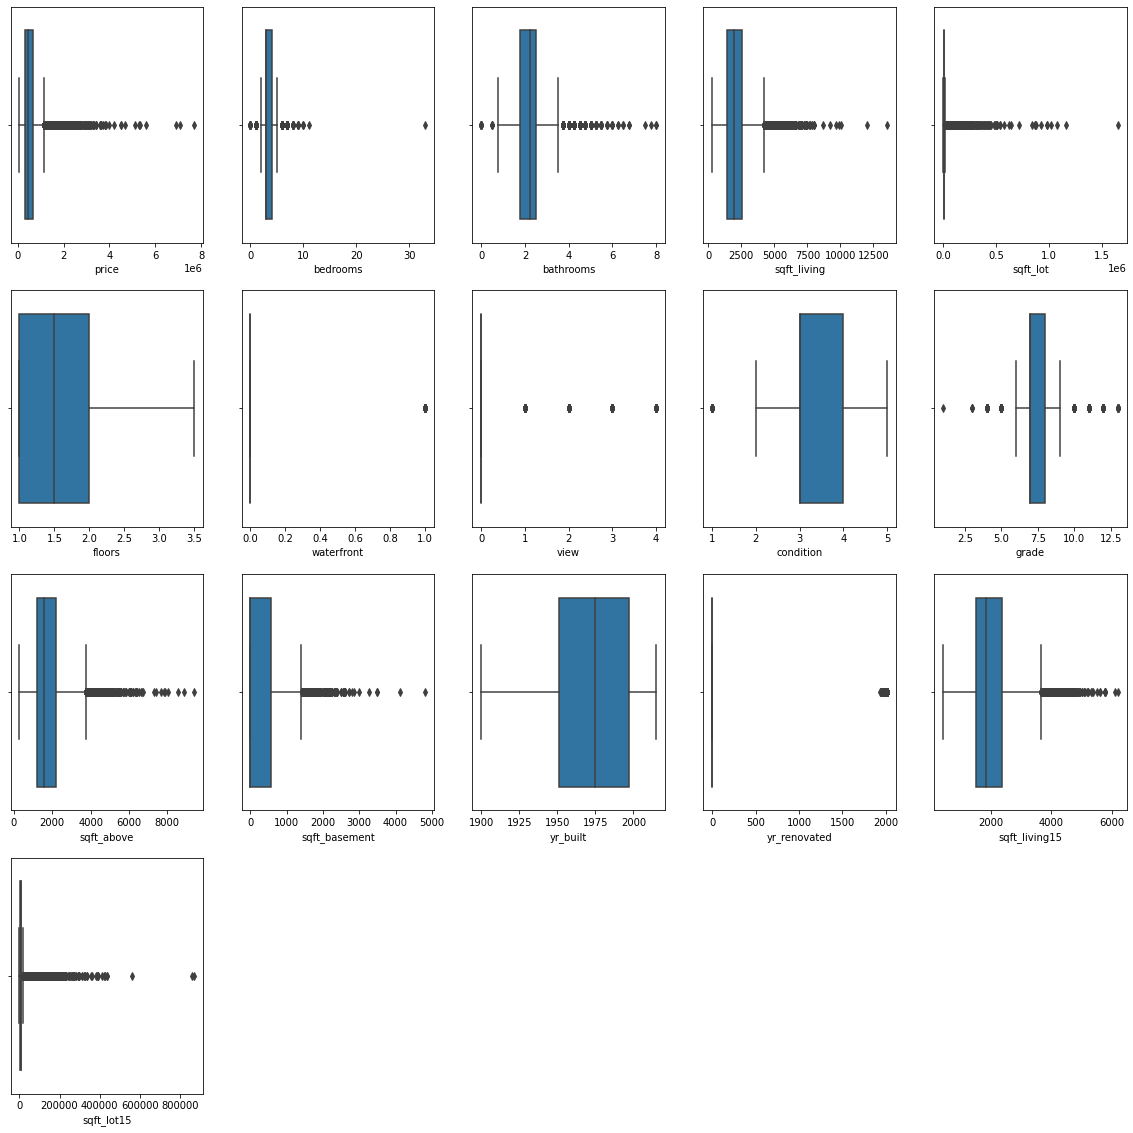

In [10]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

df_describe = df.drop(columns = ['id', 'date', 'lat','long', 'zipcode'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

# from this box plot below we can see there are outliers in many of the columns
# i will not remove the outliers in the columns since its common to have outliers when it comes to house sales in real life

### Checking Houses that has 0 bedrooms or 0 bathrooms 

In [11]:
### Checking the value that's unsual 
# bedroom and bathroom that's 0 

df[df['bedrooms'] < 1]

# there are rows that does not have bedrooms, which is kind of weird for a house
# i will treat this like a null value and fill it with median numbers of bedroom in a house 
# same goes to the bathrooms with 0 values as well 

id       date      price  bedrooms  bathrooms  sqft_living  \
875    6306400140 2014-06-12  1095000.0         0       0.00         3064   
3119   3918400017 2015-02-05   380000.0         0       0.00         1470   
3467   1453602309 2014-08-05   288000.0         0       1.50         1430   
4868   6896300380 2014-10-02   228000.0         0       1.00          390   
6994   2954400190 2014-06-24  1295650.0         0       0.00         4810   
8477   2569500210 2014-11-17   339950.0         0       2.50         2290   
8484   2310060040 2014-09-25   240000.0         0       2.50         1810   
9773   3374500520 2015-04-29   355000.0         0       0.00         2460   
9854   7849202190 2014-12-23   235000.0         0       0.00         1470   
12653  7849202299 2015-02-18   320000.0         0       2.50         1490   
14423  9543000205 2015-04-13   139950.0         0       0.00          844   
18379  1222029077 2014-10-29   265000.0         0       0.75          384   
19452  3980300371 2014-09-26   142000.0         0       0.00          290   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
875        4764     3.5           0     2  ...      7        3064   
3119        979     3.0           0     2  ...      8        1470   
3467       1650     3.0           0     0  ...      7        1430   
4868       5900     1.0           0     0  ...      4         390   
6994      28008     2.0           0     0  ...     12        4810   
8477       8319     2.0           0     0  ...      8        2290   
8484       5669     2.0           0     0  ...      7        1810   
9773       8049     2.0           0     0  ...      8        2460   
9854       4800     2.0           0     0  ...      7        1470   
12653      7111     2.0           0     0  ...      7        1490   
14423      4269     1.0           0     0  ...      7         844   
18379    213444     1.0           0     0  ...      4         384   
19452     20875     1.0           0     0  ...      1         290   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
875                0      1990             0    98102  47.6362 -122.322   
3119               0      2006             0    98133  47.7145 -122.356   
3467               0      1999             0    98125  47.7222 -122.290   
4868               0      1953             0    98118  47.5260 -122.261   
6994               0      1990             0    98053  47.6642 -122.069   
8477               0      1985             0    98042  47.3473 -122.151   
8484               0      2003             0    98038  47.3493 -122.053   
9773               0      1990             0    98031  47.4095 -122.168   
9854               0      1996             0    98065  47.5265 -121.828   
12653              0      1999             0    98065  47.5261 -121.826   
14423              0      1913             0    98001  47.2781 -122.250   
18379              0      2003             0    98070  47.4177 -122.491   
19452              0      1963             0    98024  47.5308 -121.888   

       sqft_living15  sqft_lot15  
875             2360        4000  
3119            1470        1399  
3467            1430        1650  
4868            2170        6000  
6994            4740       35061  
8477            2500        8751  
8484            1810        5685  
9773            2520        8050  
9854            1060        7200  
12653           1500        4675  
14423           1380        9600  
18379           1920      224341  
19452           1620       22850  

[13 rows x 21 columns]

In [12]:
# Since House with no bathroom / bedrooms is kind of unsual i will replace the 0 value in both of the columns with median
# I used median instead of mean to replace this unsual values because of there is an outliers in both of the columns

df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

## Exploratory Data Analysis



In [13]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.372646      2.115798   2079.899736   
std    2.876566e+09  3.671272e+05      0.926423      0.768823    918.440897   
min    1.000102e+06  7.500000e+04      1.000000      0.500000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

### Univariate Analysis


In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
df['bedrooms'].value_counts(normalize = True)

# almost half of the house in this dataset has 3 bedrooms

3     0.455143
4     0.318419
2     0.127701
5     0.074076
6     0.012585
1     0.009207
7     0.001758
8     0.000601
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64

In [16]:
df['bathrooms'].value_counts(normalize = True)

# the bathrooms number is more varied compared to the bedrooms in each houses 
# almost a quarter of the houses in king county has 2.5 bathrooms

2.50    0.248924
1.00    0.178226
1.75    0.141026
2.25    0.095174
2.00    0.089298
1.50    0.066904
2.75    0.054828
3.00    0.034840
3.50    0.033822
3.25    0.027252
3.75    0.007172
4.00    0.006293
4.50    0.004627
4.25    0.003655
0.75    0.003331
4.75    0.001064
5.00    0.000972
5.25    0.000601
5.50    0.000463
1.25    0.000416
6.00    0.000278
0.50    0.000185
5.75    0.000185
6.75    0.000093
8.00    0.000093
6.25    0.000093
6.50    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64

In [21]:
df['age_group'].value_counts()

KeyError: 'age_group'

## Visualization 

### Price Distribution Visualization

F:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

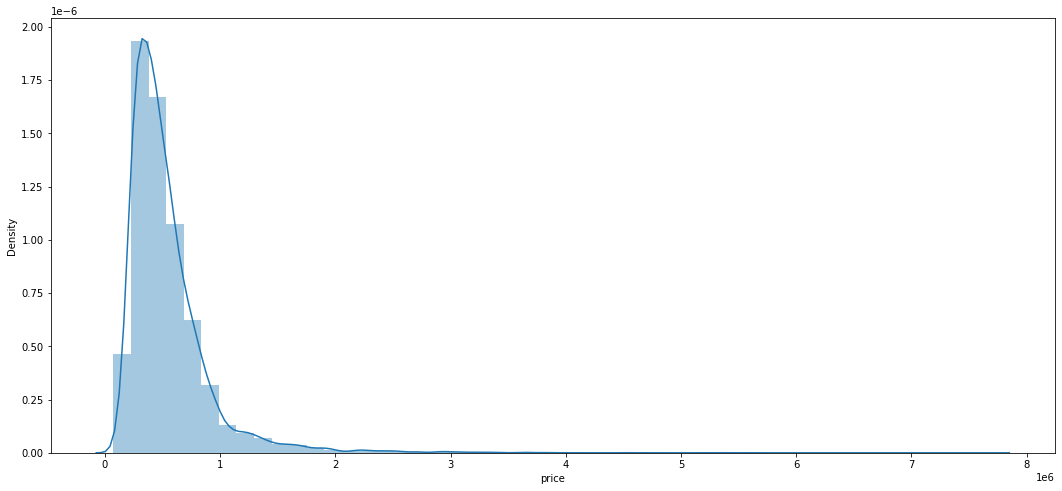

In [17]:
plt.figure(figsize = (18, 8))
sns.distplot(df['price'])

# Majority of the prices are  less than 1000000 $ (right skewed)
# this distribution plot does not tell much about anything

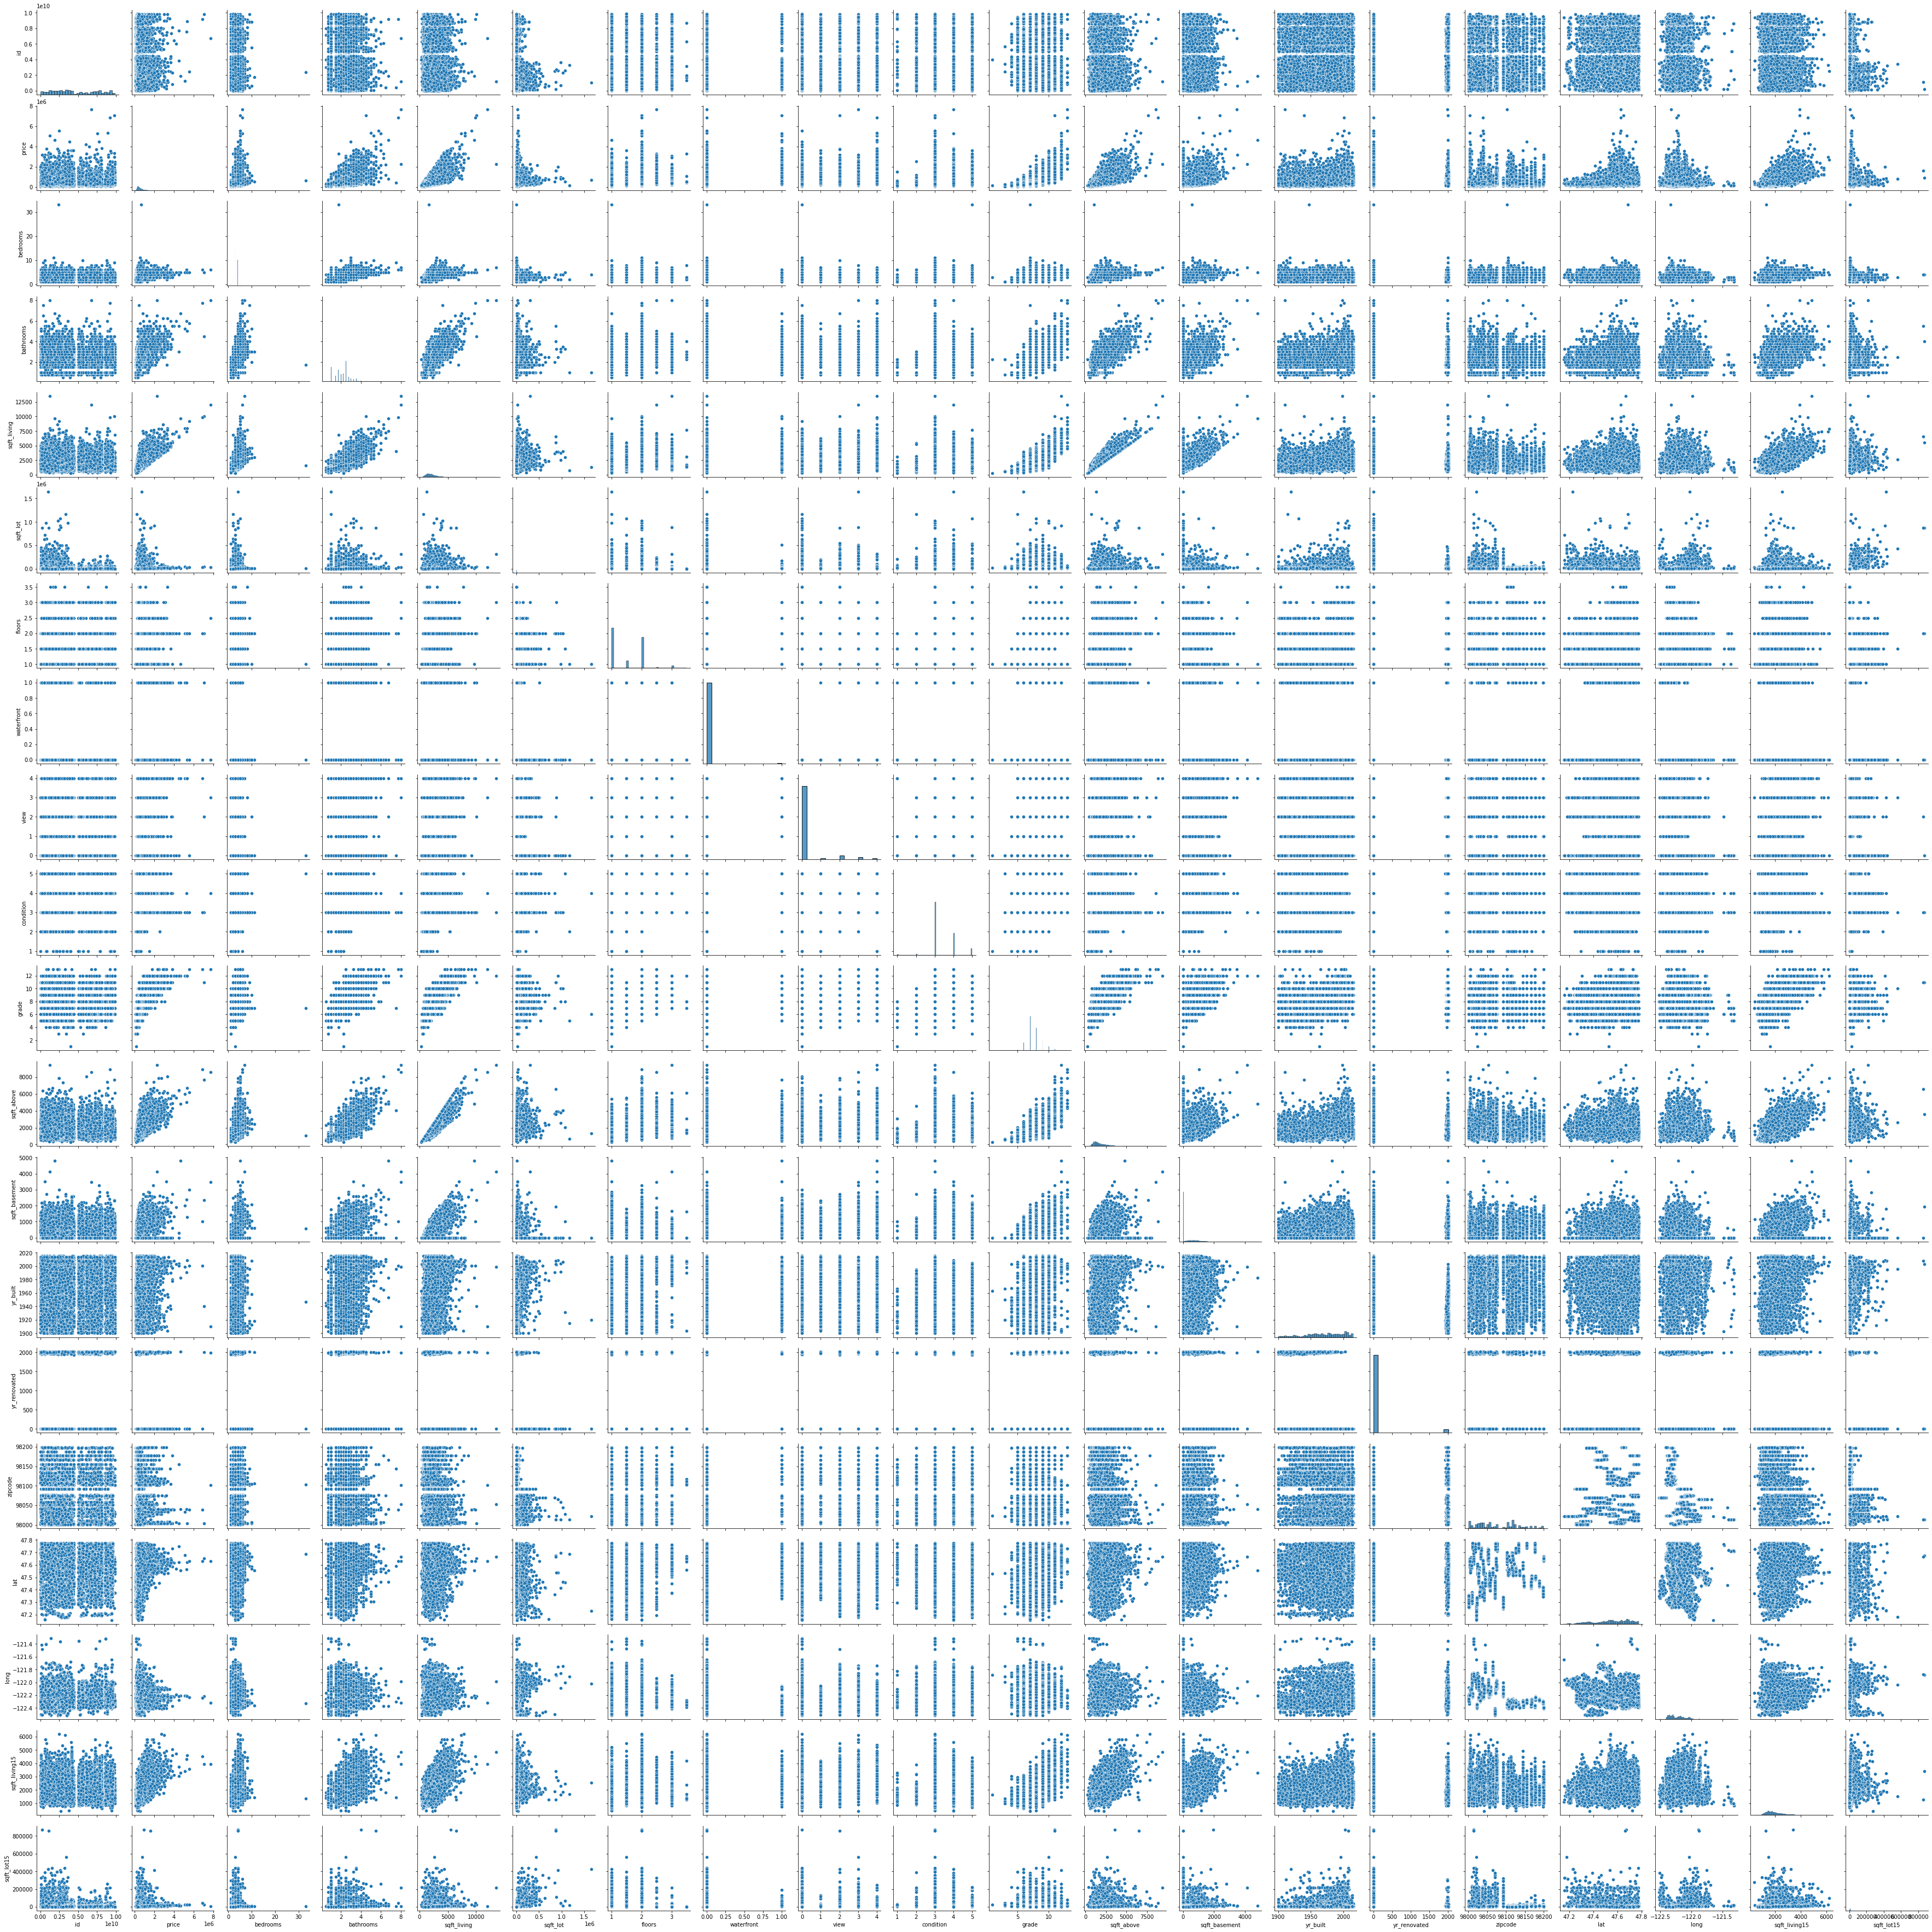

In [18]:
sns.pairplot(df)

### WaterFront


F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='count'>

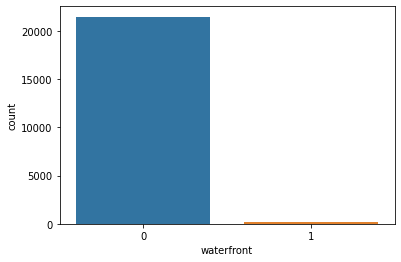

In [19]:
sns.countplot(df['waterfront'])

# almost all of the house in this dataset doesn't have a front facing waterfront
# Waterfront is not a feature that many buyer considered before buying a home in King county 

### Price Group 



In [20]:
plt.figure(figsize = (15, 8))

sns.countplot(df['price_group'])
plt.xticks(rotation = 90)
plt.title('Number of Houses per Price Group')

plt.show()

#   majority of the houses fall in range 250k to 500k

# The Next Higest Category Are :

# - 500k - 750k


# - 0 - 250k


# - 750k - 1 million


# - 1 million - 2 million


# - More than 2 million

KeyError: 'price_group'

<Figure size 1080x576 with 0 Axes>

### Number of houses per Quality

In [ ]:
plt.figure(figsize = (15 , 7))
sns.countplot(df['Quality'])
plt.title('Quality of the Houses')
plt.show()

# Majority of the houses are in average Quality

### Number of Houses Sold based on view features

In [ ]:
plt.figure(figsize = (10, 7))
sns.countplot(df['view'], palette = 'Paired')
plt.title('Number of house sold per view rating')

# 90 % of the house sold has 0 view 
# this shows that buyer in king county WA doesn't really care about view rating of a house 

In [ ]:
df.stb.freq(['view'], cum_cols = False).sort_values('count', ascending = False).head()

### Number Of Bedrooms and Bathrooms

In [ ]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
sns.countplot(df['bedrooms'])
plt.title('Number of Bedrooms')
plt.subplot(1,2,2)
sns.countplot(df['bathrooms'])
plt.xticks(rotation = 90)
plt.title('Number of Bathrooms')

# Buyer in king county preffered a house that has 3 to 4 bedrooms and 1 to 2.5 bathrooms

In [ ]:
df.columns

### Age Group 

In [ ]:
plt.figure(figsize = (15, 8))

sns.countplot(df['age_group'])
plt.title('Number of Houses per Age Group')

#### Basement

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['sqft_basement'])

# Majority of the house sold in king county doesn't have any basement 60. 7 %

In [ ]:
df.stb.freq(['sqft_basement'], cum_cols = False).sort_values('count', ascending = False).head()

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
correlation = df.corr()
correlation['price'].sort_values(ascending = False)[1:]

# columns ordered from the higest posisve correlation to the lowest

In [ ]:
df.head()

## Price Group

### Waterfront and Prices Group

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'waterfront', y='price_group', data = df, ci = False, palette= 'pastel')

### The more expensive the houses the more likely the house has a waterfront

### Price Group and Sqft living

In [ ]:
plt.figure(figsize = (15, 8))
plt.subplot(1,2,1)
sns.barplot(y = 'sqft_living', x = 'price_group', data = df, ci = False, palette = 'BuPu')
plt.xticks(rotation = 90)
plt.title('Sqft Living to prices ')

plt.subplot(1,2,2)
sns.barplot(y = 'sqft_lot', x = 'price_group', data = df, ci= False, palette = 'BuPu')
plt.xticks(rotation = 90)
plt.title('Sqft Lot to Prices')

# the more expensive the house the bigger the average square footage of the living space 
# houses that's in range of 1 - 2 million has the biggest average sqft lot

#### Price Group and Average Basement Size

In [ ]:


plt.figure(figsize = (10,5))
sns.boxplot(x = 'price_group', y='sqft_basement', data = df ,palette = 'icefire')
plt.xticks(rotation = 90)
plt.title('Average Basement size per price group')
plt.show()

# The bigger the basement size the higher the value of a house


In [ ]:
df.columns

#### Average Price per Age Group

In [ ]:
plt.figure(figsize = (12 , 5))
sns.violinplot(x = df['price_group'], y= df['age'], ci = False, palette = 'icefire_r')
plt.title('Average Age per Price Group')
plt.xticks(rotation = 90)
plt.show()
# the age group of the house doesn't really have a positve or negative correlation with the price
# house that's on the lower price tend to be older in average 

#### Houses Price Group and Quality

In [ ]:
plt.figure(figsize = (12 , 8))
sns.countplot(x = 'price_group', hue = 'Quality',data = df, palette = 'viridis')
plt.title('Quality Per Price Group')
plt.xticks(rotation = 90)
plt.show()
# Houses that has high Quality are houses that has value from 750k and above 
# Theres no Low quality houses when prices are range from 500k and above

### House Price Group and View

In [ ]:
plt.figure(figsize = (18, 8))

sns.countplot(x = df['view'], hue = 'price_group', data = df)

# this shows that view does not impact the sales of a house much

In [ ]:
plt.figure(figsize = (18, 8))

plt.subplot(1,2,1)
sns.barplot(x = df['price_group'], y =df['sqft_lot15'], palette = 'PuBuGn', ci = False)
plt.xticks(rotation = 90)
plt.title('Average Neighborhood lot size')
plt.subplot(1,2,2)
sns.barplot(x = df['price_group'], y =df['sqft_living15'], palette = 'PuBuGn', ci = False)
plt.xticks(rotation = 90)
plt.title('Average Neighborhood living size')

## The more expensive the house the bigger the average neighbor lot size and house living size

## Price

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'zipcode', y= 'price', data = df, palette = 'viridis',ci = False)
plt.xticks(rotation = 90)
plt.tight_layout()

# House in zipcode 98039,98004, 98040 are the top 3 zipcode with the highest average price 
# House in zipcode 98002,98168, 98032 are the top 3 zipcode with the highest average price

### Price and number of bedrooms & Bathrooms

In [ ]:
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
sns.barplot(x = 'bedrooms', y='price', data = df, ci = False, palette = 'cividis')
plt.title('Average Prices Per Number of Bedrooms')
plt.subplot(1,2,2)
sns.barplot(x = 'bathrooms', y='price', data = df, ci = False, palette = 'cividis')
plt.xticks(rotation = 90)
plt.title('Average Prices Per Number of Bathrooms')


# The more the bedrooms doesn't mean the the more expensive the houses
# House with 8 bedrooms shows to be the most expensive house in average 
# numbers of bathrooms somewhat have a positive correlation with the average price of the houses price 
# however there's a weird pattern of house that has 7.5 bathrooms it seems to have an extremely low price 

### Price and Quality



In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Quality', y='price', data = df, ci = False, palette = 'viridis')
plt.title('Average Prices Per Quality')

# House with high Quality has 3x the average value of house with average quality and almost 7 X the average value of house with low quality

### Average Price per View

In [ ]:
plt.figure(figsize = (18, 8))
sns.barplot(x = df['view'], y = df['price'], hue = df['price_group'], ci = False)
plt.title('Average Price based on view per price group')

# There's is no major significance of average price and view if we compared it per price group
# the analogy here is even if your houses has the most beautiful view in King County it shouldb't affect the price much

In [ ]:
plt.figure(figsize = (10, 5))
sns.lmplot(x = 'sqft_living', y = 'sqft_living15', data = df)
plt.title('Living Size Correlation with Neighbors Living Size')


## the size of living space of nearest 15 neighbors are highly corelated with the living size of the houses

# Conclusion: Houses in the same neighborhood tend to have similar sizes
# Houses in the same neighborhood tend to be in the similar price Group

In [ ]:
sns.lmplot(x = 'sqft_lot', y = 'sqft_lot15', data = df)
plt.title('House Lot Correlation with Neighbors House Lot')

# Conclusion 

 - **Houses with less than one year of age has the highest median price of all age group**
 - Majority of the houses are in average condition
 - **501 out of 502 houses with high quality** are priced above the median price of the houses 
 - **Majority of houses price around 250 - 500k** in King County
 - **98102** zipcode has the highest average price per square foot among all zipcode in king county
 - **98070** zipcode has the lowest average price per square foot among all zipcode
 - House lot size is positively correlated with neighborhood house lot size
 - House price that's above the median (450.000 $) tend to be  closer to the water compared to the houses that below the median price
- House price that's below the median house price are more likely to be in the middle of the city

- House that has 3 bedrooms are more the most frequent house that's sold in king county

- the size of living space of nearest 15 neighbors are highly corelated with the living size of the houses

- the lot size of your nearest 15 neighbors are highly corelated to with house lot size

- Random Forest with HyperParameter Tuning has the Higest evaluation matrix to predict house prices in King County with the r2 score of 89 % (Please look at the machine learning modeling to see the model)


## SLR Model

## Simple Linear Regression (SLR) model, we must have an independent variable and a dependent variable. For our SLR model, we are going to take sqft_lot as the independent variable and undoubtedly price as the dependent variable. 

In [ ]:
X_var = df[["sqft_living"]] # independent variable
y_var = df["price"] # dependent variable

## using scikit-learn, we are going to use the ‘train_test_split’ algorithm to process our model. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

In [ ]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sns.scatterplot(x = "sqft_living", y = "price", data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df["sqft_living"], slr_slope*df["sqft_living"] + slr_intercept, color = 'r', linewidth = 3)
plt.title("sqft_living versus price", fontsize = 16)
plt.ylabel("price", fontsize = 12)
plt.xlabel("sqft_living", fontsize = 12)

In [ ]:
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

## we will be building a model using statsmodels at first and followed by scikit-learn.

In [ ]:
!pip install termcolor
import statsmodels.api as sm
from termcolor import colored as cl

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

In [ ]:
print(cl(slr_reg.summary(),attrs = ["bold"]))

## MLR Model

In [ ]:
X1_var = df[["sqft_living","grade","sqft_above","sqft_living15"]]
y_var = df["price"] # dependent variable

In [ ]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## This distribution plot reveals that our prediction values have performed almost precisely to our actual values but there are some outliers that can be noticed. This is because we have built a very basic model on Linear Regression to precisely predict the outcomes.

## using statsmodels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)